In [255]:
plt.style.available
plt.style.use("seaborn-colorblind")

In [256]:
import seaborn as sb

In [270]:
import matplotlib.pyplot as plt
%matplotlib notebook
plt.style.use("seaborn-colorblind")

train = pd.read_csv("/home/emil/Documents/github/data-science/kaggle/Titanic/train.csv")
test = pd.read_csv("/home/emil/Documents/github/data-science/kaggle/Titanic/test.csv")

In [268]:
# Recon
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<IPython.core.display.Javascript object>


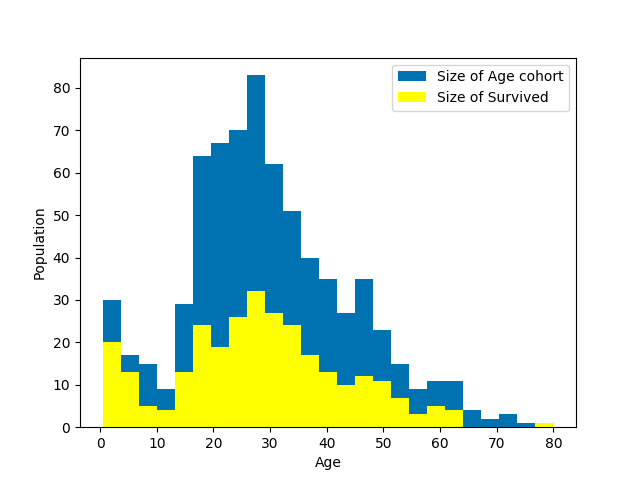

In [269]:
# Here I overlay two histograms on top of another
plt.figure()
plt.hist(train.loc[train.Age.notnull(), 'Age'], bins=25);
plt.hist(train.loc[ ((train.Survived == 1) & (train.Age.notnull()) ), 'Age'], color='yellow', bins=25);
ax = plt.gca();
ax.set_xlabel("Age");
ax.set_ylabel("Population");
ax.legend(['Size of Age cohort', 'Size of Survived']);

<IPython.core.display.Javascript object>


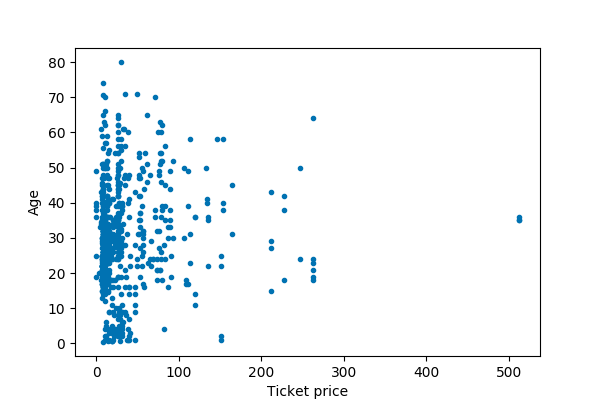

In [271]:
plt.figure(figsize=[6, 4])
plt.scatter(train.Fare, train.Age, marker='.');
ax = plt.gca()
ax.set_xlabel("Ticket price");
ax.set_ylabel("Age");
# Same result, less typing:
# df.plot('Fare', 'Age', kind="scatter")

<IPython.core.display.Javascript object>


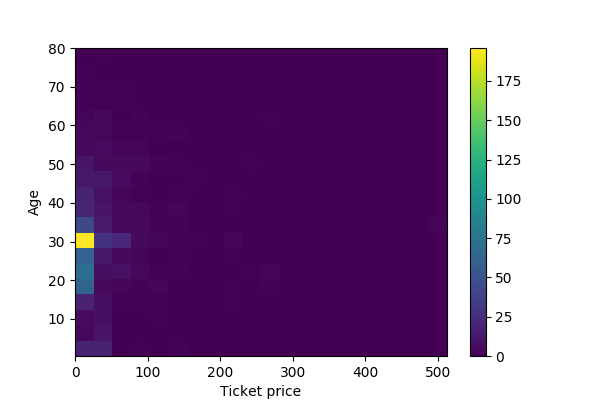

In [251]:
# The same data using a heatmap (2d histogram)

'''
Given a set of ordered pairs describing data points, 
you can count the number of points with similar values to construct a two-dimensional histogram. 
This is similar to a one-dimensional histogram, 
but it describes the joint variation of two random variables rather than just one.
''';

plt.figure(figsize=[6, 4])
plt.hist2d(train.Fare, train.Age.fillna(28), bins=20);
plt.colorbar()
ax = plt.gca()
ax.set_xlabel("Ticket price");
ax.set_ylabel("Age");

In [250]:
sb.heatmap(train[['Fare', 'Age']])

In [229]:
locations = train.groupby("Embarked").agg({'Survived' : np.sum, 'PassengerId' : len }).reset_index()
locations['% survived'] = round(locations.Survived / locations.PassengerId, 2)
locations

,Embarked,PassengerId,Survived,% survived
0,C,168,93,0.55
1,Q,77,30,0.39
2,S,644,217,0.34


<IPython.core.display.Javascript object>


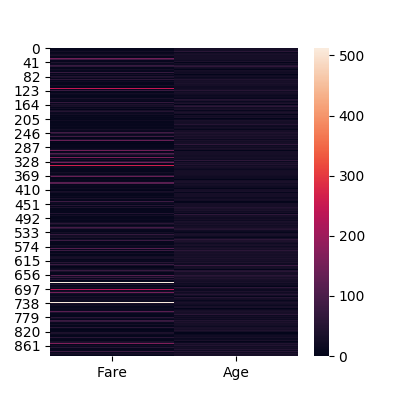

In [230]:
plt.figure(figsize=(4, 4))
ax = plt.gca()
ax.grid()
plt.bar([1, 2, 3], locations['% survived'])
plt.xticks([1, 2, 3])

ax.set_xticklabels(locations.Embarked)
ax.set_ylim([0, 1])
ax.set_ylabel("% survived");
ax.set_xlabel("Embark Port");

In [231]:
train.Age.median(), round(train.Age.mean(), 0)

(28.0, 30.0)

In [232]:
train.Cabin.value_counts(dropna=False)[:10]

NaN            687
C23 C25 C27      4
G6               4
B96 B98          4
D                3
F2               3
F33              3
E101             3
C22 C26          3
E8               2
Name: Cabin, dtype: int64

In [233]:
train.drop(['Cabin', 'Ticket'], axis=1, inplace=True)

In [234]:
gender = train[['Sex', 'Survived']].groupby("Sex").agg([np.sum, np.size])
gender['% survived'] = gender['Survived']['sum'] / gender['Survived']['size']
gender

Survived      % survived
            sum size           
Sex                            
female      233  314   0.742038
male        109  577   0.188908

In [235]:
for df in [train, test]:
    df.Sex = df.Sex.map({'male' : 0, 'female' : 1})
    df.Embarked = df.Embarked.map({'S': 0, 'C' : 1, 'Q' : 2})
    df.Embarked.fillna(value=train.Embarked.value_counts(sort=True).index[0], inplace=True)
    df.Age.fillna(value=29, inplace=True)

In [237]:
train.groupby("Pclass").agg({'Fare' : np.mean})

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


In [240]:
class_survival = train[['Pclass', 'Survived']].groupby("Pclass").agg([np.size, np.sum])
class_survival['% survived'] = round(class_survival['Survived']['sum'] /  class_survival['Survived']['size'], 2)
class_survival

In [91]:
# To Do:
#heatmap
#seaborn

<IPython.core.display.Javascript object>


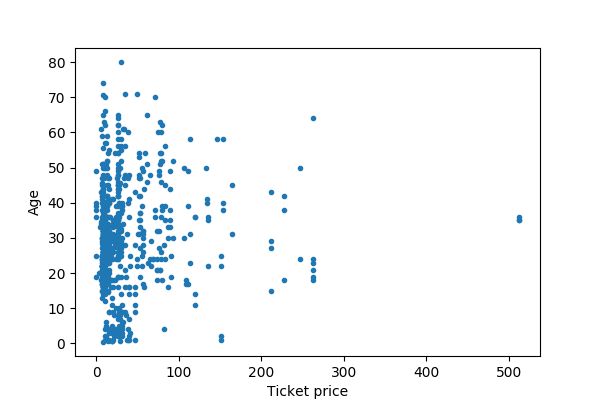

In [136]:

#plt.hist2d(train.Fare.fillna(250), train.Age.fillna(28), bins=27)

<IPython.core.display.Javascript object>


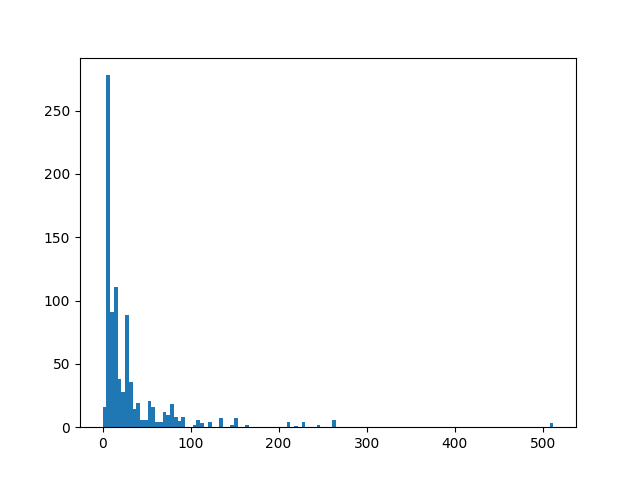

(array([ 16., 278.,  91., 111.,  38.,  28.,  89.,  36.,  14.,  19.,   6.,
          6.,  21.,  16.,   4.,   4.,  12.,  10.,  18.,   8.,   5.,   8.,
          0.,   0.,   2.,   6.,   3.,   0.,   4.,   0.,   0.,   7.,   0.,
          0.,   2.,   7.,   0.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   4.,   0.,   1.,   0.,   4.,   0.,
          0.,   0.,   2.,   0.,   0.,   0.,   6.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,   4.26941,   8.53882,  12.80823,  17.07764,  21.34705,
         25.61646,  29.88587,  34.15528,  38.42469,  42.6941 ,  46.96351,
         51.23292,  55.50233,  59.77174,  

In [101]:
plt.figure()
plt.hist(train.Fare, bins=120)

In [111]:
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)

<IPython.core.display.Javascript object>


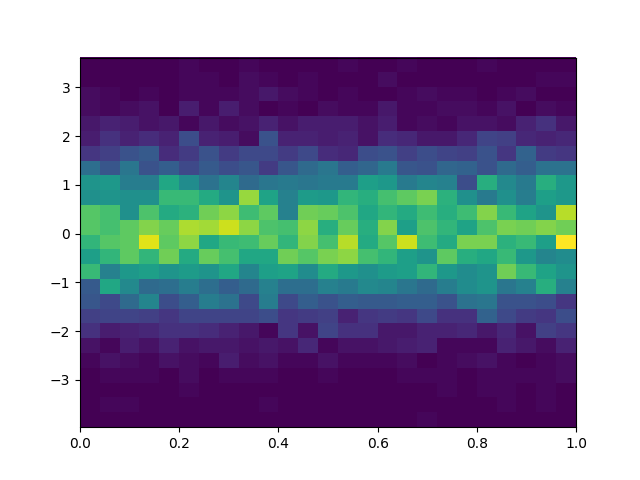

(array([[ 0.,  0.,  0.,  0.,  1.,  3.,  9., 12., 17., 18., 43., 36., 42.,
         47., 47., 32., 33., 23., 10.,  5.,  4.,  2.,  2.,  0.,  0.],
        [ 0.,  1.,  0.,  1.,  3.,  1.,  5., 13., 14., 38., 28., 42., 47.,
         45., 45., 33., 34., 17., 12.,  9.,  6.,  1.,  1.,  0.,  0.],
        [ 0.,  1.,  0.,  1.,  2.,  5.,  6., 13., 22., 30., 34., 48., 48.,
         48., 32., 32., 27., 25., 16.,  6.,  5.,  2.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  1.,  3.,  7., 12., 29., 22., 36., 42., 61.,
         52., 46., 32., 27., 16., 18.,  8.,  3.,  3.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  3.,  6.,  9., 10., 15., 23., 33., 50., 48.,
         49., 39., 43., 38., 19.,  8.,  6.,  4.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  2.,  2.,  3.,  9., 13., 19., 27., 35., 39., 53.,
         56., 41., 43., 31., 14., 11., 15.,  1.,  5.,  1.,  1.,  1.],
        [ 0.,  0.,  0.,  0.,  1.,  4.,  8., 13., 27., 23., 33., 49., 38.,
         55., 50., 39., 24., 18., 16.,  6.,  4.,  1.,  1.,  1.

In [112]:
plt.figure()
plt.hist2d(X, Y, bins=25)

In [128]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [213]:
sorted(train.Fare)

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 4.0125,
 5.0,
 6.2375,
 6.4375,
 6.45,
 6.4958,
 6.4958,
 6.75,
 6.75,
 6.8583,
 6.95,
 6.975,
 6.975,
 7.0458,
 7.05,
 7.05,
 7.05,
 7.05,
 7.05,
 7.05,
 7.05,
 7.0542,
 7.0542,
 7.125,
 7.125,
 7.125,
 7.125,
 7.1417,
 7.225,
 7.225,
 7.225,
 7.225,
 7.225,
 7.225,
 7.225,
 7.225,
 7.225,
 7.225,
 7.225,
 7.225,
 7.2292,
 7.2292,
 7.2292,
 7.2292,
 7.2292,
 7.2292,
 7.2292,
 7.2292,
 7.2292,
 7.2292,
 7.2292,
 7.2292,
 7.2292,
 7.2292,
 7.2292,
 7.25,
 7.25,
 7.25,
 7.25,
 7.25,
 7.25,
 7.25,
 7.25,
 7.25,
 7.25,
 7.25,
 7.25,
 7.25,
 7.3125,
 7.4958,
 7.4958,
 7.4958,
 7.5208,
 7.55,
 7.55,
 7.55,
 7.55,
 7.6292,
 7.65,
 7.65,
 7.65,
 7.65,
 7.725,
 7.7292,
 7.7333,
 7.7333,
 7.7333,
 7.7333,
 7.7375,
 7.7375,
 7.7417,
 7.75,
 7.75,
 7.75,
 7.75,
 7.75,
 7.75,
 7.75,
 7.75,
 7.75,
 7.75,
 7.75,
 7.75,
 7.75,
 7.75,
 7.75,
 7.75,
 7.75,
 7.75,
 7.75,
 7.75,
 7.75,
 7.75,
 7.75,
 7.75,
 7.75,
 7

<IPython.core.display.Javascript object>


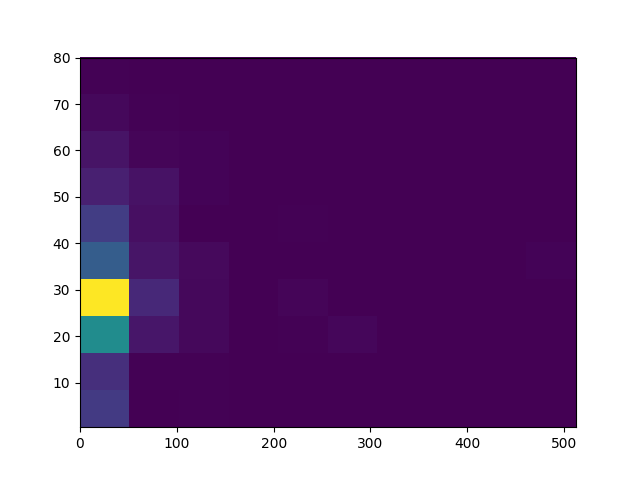

(array([[ 51.,  41., 146., 300.,  89.,  54.,  26.,  16.,   7.,   2.],
        [  1.,   2.,  18.,  35.,  17.,  12.,  15.,   4.,   2.,   0.],
        [  2.,   2.,   6.,   6.,   8.,   1.,   3.,   3.,   0.,   0.],
        [  0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.],
        [  0.,   1.,   2.,   4.,   1.,   2.,   1.,   0.,   0.,   0.],
        [  0.,   0.,   5.,   0.,   0.,   0.,   0.,   1.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   3.,   0.,   0.,   0.,   0.,   0.]]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <matplotlib.image.AxesImage at 0x7f34ab2bbeb8>)

In [208]:
train.Fare.isnull().unique()

array([False], dtype=object)